# Department Store Sales Forecasting

## Time Series Analysis (2/3)

## Contents
- [Data Import](#Data-Import)   
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)   

## Data Import 

### Libraries

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [2]:
# Change the option to display with no max
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

### Data Import

In [3]:
# Read in the data
df = pd.read_csv(
    "../data/4521_department_stores_v2_clean.csv", index_col="date", parse_dates=True
)

# Review
df.head()

,sales
date,
1992-01-01,14134
1992-02-01,14472
1992-03-01,14543
1992-04-01,14529
1992-05-01,14634


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 374 entries, 1992-01-01 to 2023-02-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sales   374 non-null    int64
dtypes: int64(1)
memory usage: 5.8 KB


In [5]:
df.isnull().sum()

sales    0
dtype: int64

## Exploratory Data Analysis

In [6]:
# Reference: GA's 1006 Lesson on Time Series Modeling

# Define a function
def plot_series(
    df,
    cols=None,
    title="Title",
    xlab="Date",
    ylab="Retail Sales (Millions of U.S. Dollars)",
    steps=1,
):

    # Set figure size to be (10, 6).
    plt.figure(figsize=(12, 4))

    # Iterate through each column name.
    for col in cols:

        # Generate a line plot of the column name.
        # You only have to specify Y, since our index will be a datetime index.
        plt.plot(df[col])

    # Generate title and labels
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)

    # Enlarge tick marks
    plt.yticks()
    plt.xticks(df.index[0::steps]);

**Trends**:  There is a clear trend in department store sales, particularly after 2000. Sales increased until 2000, after which they started to decline. More recently, sales experienced a sharp decline in 2020 due to the COVID-19 pandemic. However, sales quickly recovered and returned to pre-pandemic levels after a few months.

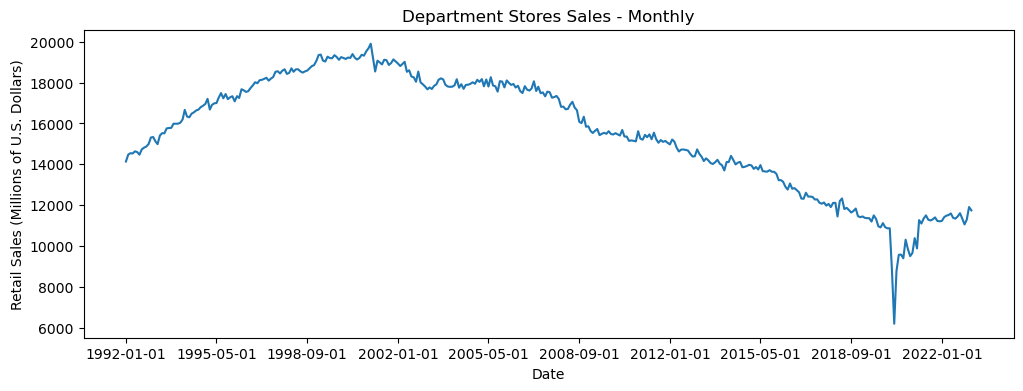

In [7]:
# Plot
plot_series(df, ["sales"], title="Department Stores Sales - Monthly", steps=40)

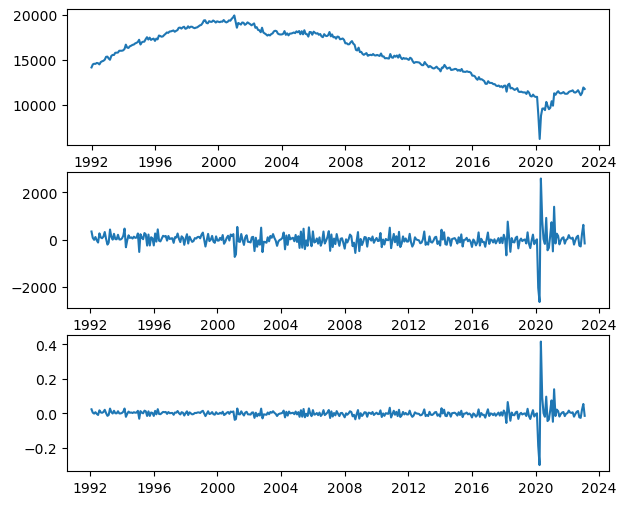

In [8]:
fig, axes = plt.subplots(nrows=3, figsize=(7, 6))
axes[0].plot(df["sales"])
axes[1].plot(df["sales"].diff())
axes[2].plot(df["sales"].pct_change());

**Seasonality**: The data shows evidence of seasonality, with peaks in sales occurring approximately every twelve months.

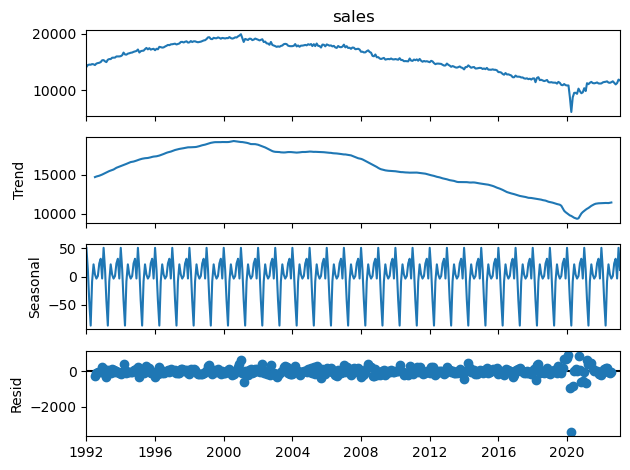

In [9]:
# Decompose time series into trend, seasonal, and residual components
decomp = seasonal_decompose(df["sales"])

# Plot the decomposed time series
decomp.plot();

**Autocorrelation (acf)**: The ACF plot indicates a strong correlation between department store sales over time. When sales increase, they tend to continue increasing, and when sales decrease, they tend to continue decreasing. This trend is indicative of positive autocorrelation in the sales data.

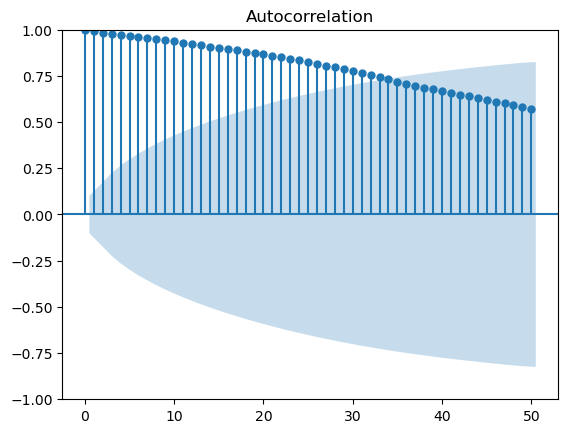

In [10]:
# Plot up to 50 time periods
plot_acf(df["sales"], lags=50);

**Partial Autocorrelation (pacf)**: The partial autocorrelations for lags 1 and 2 are statistically significant and the partial autocorrelations for lags 3 and 4 are close to the significant limits. It means that the values of partial autocorrelation at these lags are not likely due to random chance. 

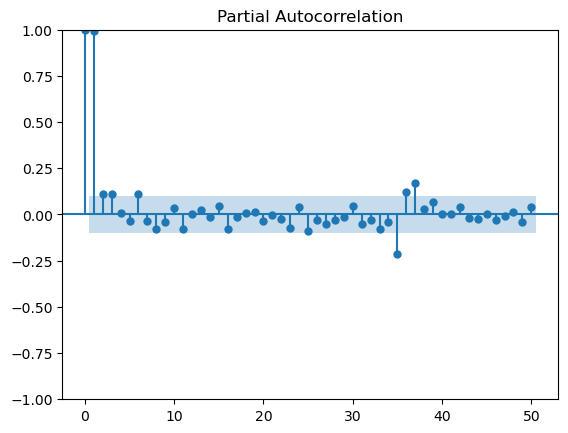

In [11]:
# Plot up to 50 time periods.
plot_pacf(df["sales"], lags=50, method="ywm");

#### Audgmented Dickey-Fuller (ADF) test

In [12]:
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:3], index=["Test Statistic", "p-value", "Lag Used"])
    return dfoutput

In [13]:
# Run ADF test on the original data.
interpret_dftest(adfuller(df["sales"]))

Test Statistic    -0.334448
p-value            0.920482
Lag Used          10.000000
dtype: float64

In [14]:
# Run ADF test on the first-differenced data
interpret_dftest(adfuller(df["sales"].diff(1).dropna()))

Test Statistic   -5.071363
p-value           0.000016
Lag Used          9.000000
dtype: float64

In [15]:
# Run ADF test on the second-differenced data
interpret_dftest(adfuller(df["sales"].diff(2).dropna()))

Test Statistic   -4.931928
p-value           0.000030
Lag Used          8.000000
dtype: float64

In [16]:
# Run ADF test on the third-differenced data
interpret_dftest(adfuller(df["sales"].diff(3).dropna()))

Test Statistic    -4.524490
p-value            0.000178
Lag Used          13.000000
dtype: float64

In [17]:
# Run ADF test on the third-differenced data
interpret_dftest(adfuller(df["sales"].diff(4).dropna()))

Test Statistic    -3.427356
p-value            0.010061
Lag Used          17.000000
dtype: float64

The result suggests that original series is non-stationary (th p-value is very high), but the first and second order (as well as third and fourth) differences of the series are stationary (the p-values are very low, below 0.05) and so they would be appropriate to use in the model. 

In [18]:
# Presentation Color
# ffb554, #ff3070, #ff8876, (#ebebeb, #333333, #ffffff)